In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV
from IPython.display import Image

# Pandasの設定をします
pd.set_option('chained_assignment', None)

# matplotlibのスタイルを指定します。これでグラフが少しかっこよくなります。
plt.style.use('ggplot')
plt.rc('xtick.major', size=0)
plt.rc('ytick.major', size=0)

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
x = df_train['Sex']
y = df_train['Survived']

In [12]:
y_pred = x.map({'female' : 1, 'male' : 0}).astype(int)

In [10]:
print('Accuracy: {0}'.format(accuracy_score(y, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y, y_pred)))

Accuracy: 0.7867564534231201
Accuracy: 0.787


In [13]:
cm = confusion_matrix(y, y_pred)
print(cm)

[[468  81]
 [109 233]]


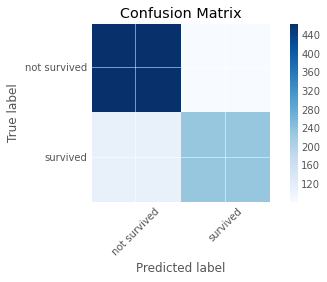

In [14]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    fig.colorbar(im)

    target_names = ['not survived', 'survived']

    tick_marks = np.arange(len(target_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(target_names)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.tight_layout()

plot_confusion_matrix(cm)

In [15]:
x_test = df_test['Sex']
y_test_pred = x_test.map({'female': 1, 'male': 0}).astype(int)

#Kaggleファイル作成

In [16]:
df_kaggle = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived':np.array(y_test_pred)})
df_kaggle.to_csv('kaggle_gendermodel.csv', index=False)

In [29]:
X = df_train[['Age', 'Pclass', 'Sex']]
y = df_train['Survived']

In [30]:
X.head()

,Age,Pclass,Sex
0,22,3,male
1,38,1,female
2,26,3,female
3,35,1,female
4,35,3,male


In [31]:
X['AgeFill'] = X['Age'].fillna(X['Age'].mean())
X = X.drop(['Age'], axis=1)

In [32]:
X.head()

,Pclass,Sex,AgeFill
0,3,male,22
1,1,female,38
2,3,female,26
3,1,female,35
4,3,male,35


In [33]:
X['SexNumber'] = X['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [34]:
X.head()

,Pclass,Sex,AgeFill,SexNumber
0,3,male,22,1
1,1,female,38,0
2,3,female,26,0
3,1,female,35,0
4,3,male,35,1


In [36]:
X.drop(['Sex'], axis =1).tail()

,Pclass,AgeFill,SexNumber
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [37]:
X['Pclass_Gender'] = X['Pclass'] + X['SexNumber']

In [38]:
X.tail()

,Pclass,Sex,AgeFill,SexNumber,Pclass_Gender
886,2,male,27.000000,1,3
887,1,female,19.000000,0,1
888,3,female,29.699118,0,3
889,1,male,26.000000,1,2
890,3,male,32.000000,1,4


In [39]:
X = X.drop(['Pclass', 'Sex', 'SexNumber'], axis = 1)

In [40]:
X.head()

,AgeFill,Pclass_Gender
0,22,4
1,38,1
2,26,3
3,35,1
4,35,4


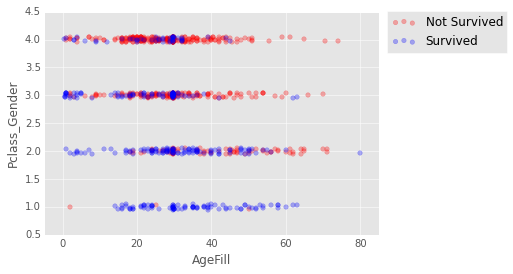

In [41]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = y[y==0].index
index_notsurvived = y[y==1].index

fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(X.loc[index_survived, 'AgeFill'],
                X.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(X.loc[index_notsurvived, 'AgeFill'],
                X.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))
plt.show()

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)

In [43]:
print('Num of Training Samples: {}'.format(len(X_train)))
print('Num of Validation Samples: {}'.format(len(X_val)))

Num of Training Samples: 712
Num of Validation Samples: 179


In [44]:
clf = LogisticRegression()

In [45]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [46]:
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

In [47]:
print('Accuracy on Training set:{:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Accuracy on Validation set:{:.3f}'.format(accuracy_score(y_val, y_val_pred)))

Accuracy on Training set:0.774
Accuracy on Validation set:0.760


In [48]:
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

[[93 13]
 [30 43]]


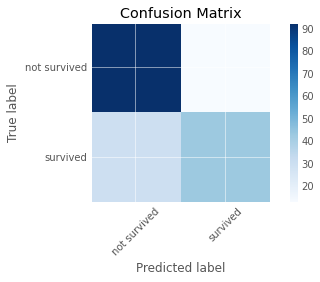

In [49]:
plot_confusion_matrix(cm)

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=33)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

print('Accuracy on Training Set:{:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Accuracy on Training Set:{:.3f}'.format(accuracy_score(y_val, y_val_pred)))

Accuracy on Training Set:0.784
Accuracy on Training Set:0.743


In [61]:
def cross_val(clf, X, y, K, random_state=0):
    cv = KFold(len(y), K, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv)
    return scores

In [62]:
clf = LogisticRegression()
scores = cross_val(clf, X, y, 5)
print('Scores:', scores)
print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

Scores: [ 0.80446927  0.74719101  0.80337079  0.74719101  0.76966292]
Mean Score: 0.774 (+/-0.051)


In [63]:
X = df_train[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
y = df_train['Survived']
X_test = df_test[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

In [64]:
X.tail()

,Age,Pclass,Sex,SibSp,Parch,Embarked
886,27,2,male,0,0,S
887,19,1,female,0,0,S
888,NaN,3,female,1,2,S
889,26,1,male,0,0,C
890,32,3,male,0,0,Q


In [65]:
X['AgeFill'] = X['Age'].fillna(X['Age'].mean())

In [66]:
X_test['AgeFill'] = X_test['Age'].fillna(X['Age'].mean())

In [67]:
X = X.drop(['Age'], axis=1)
X_test = X_test.drop(['Age'], axis=1)

In [68]:
X.tail()

,Pclass,Sex,SibSp,Parch,Embarked,AgeFill
886,2,male,0,0,S,27.000000
887,1,female,0,0,S,19.000000
888,3,female,1,2,S,29.699118
889,1,male,0,0,C,26.000000
890,3,male,0,0,Q,32.000000


In [69]:
le = LabelEncoder()
le.fit(X['Sex'])
X['Gender'] = le.transform(X['Sex'])
X_test['Gender'] = le.transform(X_test['Sex'])
classes = {gender: i for (i, gender) in enumerate(le.classes_)}
print(classes)

{'female': 0, 'male': 1}


In [70]:
X = X.join(pd.get_dummies(X['Embarked'], prefix='Embarked'))
X_test = X_test.join(pd.get_dummies(X['Embarked'], prefix='Embarked'))

In [71]:
X.tail()

,Pclass,Sex,SibSp,Parch,Embarked,AgeFill,Gender,Embarked_C,Embarked_Q,Embarked_S
886,2,male,0,0,S,27.000000,1,0,0,1
887,1,female,0,0,S,19.000000,0,0,0,1
888,3,female,1,2,S,29.699118,0,0,0,1
889,1,male,0,0,C,26.000000,1,1,0,0
890,3,male,0,0,Q,32.000000,1,0,1,0


In [72]:
X = X.drop(['Sex', 'Embarked'], axis=1)
X_test = X_test.drop(['Sex', 'Embarked'], axis=1)

In [75]:
clf = LogisticRegression()
score = cross_val(clf, X, y, 5)
print('Scores:', scores)
print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

Scores: [ 0.80446927  0.74719101  0.80337079  0.74719101  0.76966292]
Mean Score: 0.774 (+/-0.051)


In [76]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
scores = cross_val(clf, X, y, 5)
print('Scores:', scores)
print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

Scores: [ 0.78212291  0.76404494  0.79213483  0.78089888  0.7247191 ]
Mean Score: 0.769 (+/-0.048)


In [83]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4)
scores = cross_val(clf, X, y, 5)
print('Scores:', scores)
print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

Scores: [ 0.83798883  0.80337079  0.79213483  0.79213483  0.80337079]
Mean Score: 0.806 (+/-0.034)


In [81]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)

param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}
cv = KFold(len(y), 5, shuffle=True, random_state=0)

grid_search = GridSearchCV(clf, param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=891, n_folds=5, shuffle=True, random_state=0),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'min_samples_leaf': [2, 3, 4, 5], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=1)

In [82]:
print('Scores: {:.3f}'.format(grid_search.best_score_))
print('Best Parameter Choice:', grid_search.best_params_)

Scores: 0.817
Best Parameter Choice: {'min_samples_leaf': 3, 'max_depth': 4}


In [84]:
grid_search.grid_scores_

[mean: 0.76880, std: 0.02381, params: {'min_samples_leaf': 2, 'max_depth': 2},
 mean: 0.76880, std: 0.02381, params: {'min_samples_leaf': 3, 'max_depth': 2},
 mean: 0.76880, std: 0.02381, params: {'min_samples_leaf': 4, 'max_depth': 2},
 mean: 0.76880, std: 0.02381, params: {'min_samples_leaf': 5, 'max_depth': 2},
 mean: 0.80471, std: 0.01474, params: {'min_samples_leaf': 2, 'max_depth': 3},
 mean: 0.80584, std: 0.01686, params: {'min_samples_leaf': 3, 'max_depth': 3},
 mean: 0.80584, std: 0.01686, params: {'min_samples_leaf': 4, 'max_depth': 3},
 mean: 0.80584, std: 0.01686, params: {'min_samples_leaf': 5, 'max_depth': 3},
 mean: 0.81369, std: 0.01469, params: {'min_samples_leaf': 2, 'max_depth': 4},
 mean: 0.81706, std: 0.01391, params: {'min_samples_leaf': 3, 'max_depth': 4},
 mean: 0.81257, std: 0.01345, params: {'min_samples_leaf': 4, 'max_depth': 4},
 mean: 0.80808, std: 0.01750, params: {'min_samples_leaf': 5, 'max_depth': 4},
 mean: 0.80247, std: 0.01421, params: {'min_samples_

In [85]:
y_test_pred = grid_search.predict(X_test)

In [86]:
df_kaggle = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived':np.array(y_test_pred)})
df_kaggle.to_csv('kaggle_decisiontree.csv', index=False)

In [89]:
X_test

,Pclass,SibSp,Parch,AgeFill,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,34.500000,1,0,0,1
1,3,1,0,47.000000,0,1,0,0
2,2,0,0,62.000000,1,0,0,1
3,3,0,0,27.000000,1,0,0,1
4,3,1,1,22.000000,0,0,0,1
5,3,0,0,14.000000,1,0,1,0
6,3,0,0,30.000000,0,0,0,1
7,2,1,1,26.000000,1,0,0,1
8,3,0,0,18.000000,0,0,0,1
9,3,2,0,21.000000,1,1,0,0
